Backpropagatiojn in code

lr  = step의 크기. 1e-2 = 0.01
momentum 은 크게 신경 쓰지 않아도 됨

loss 는 차이로 구할 수도, 아니면 또 다른 방법으로 구할 수도 있다.
optim.step()에서 실제적으로 weight가 변함. 

첫번째 연산은 W,b가 각각 다르므로 n(입력)*m(첫째노드갯수)개 종류

data, loss, model, 기타 -> 배워야 할 내용

model.py
    layer 정의 부분 (재료, 기구 등)
    네트워크 forward부분 (조리법)

convolution: 가로*세로의 array 형태로 되어있는 입력값에 대한 filter 역할. (elementwise 곱으로 output이 나옴)
Conv2d 는 library: nn.Conv2d 로 두면, 파라미터가 그에 맞게 정의가 됨.

pooling layer: 가로*세로 사이즈를 압축
Fully connected layer: 1d로 입력이 들어온다. 모든 입력값에 대해 모든 아웃풋이 연결되어있음. 
    input 7, output5 일때, 7by5의 매트릭스 연산.


 ReLu: 음수는 0으로
PReLu: 음수는 조금 작게
softmax: output전체의 합이 1.(각각의 확률값이라 이해)
    nn.softmax(dim = ) 합이 1이 되는 차원을 선택.
FC: input feature갯수, output feature 갯수 넣어줘야함


배치 사이즈: 한번 볼 때 얼마나 볼 거냐?????

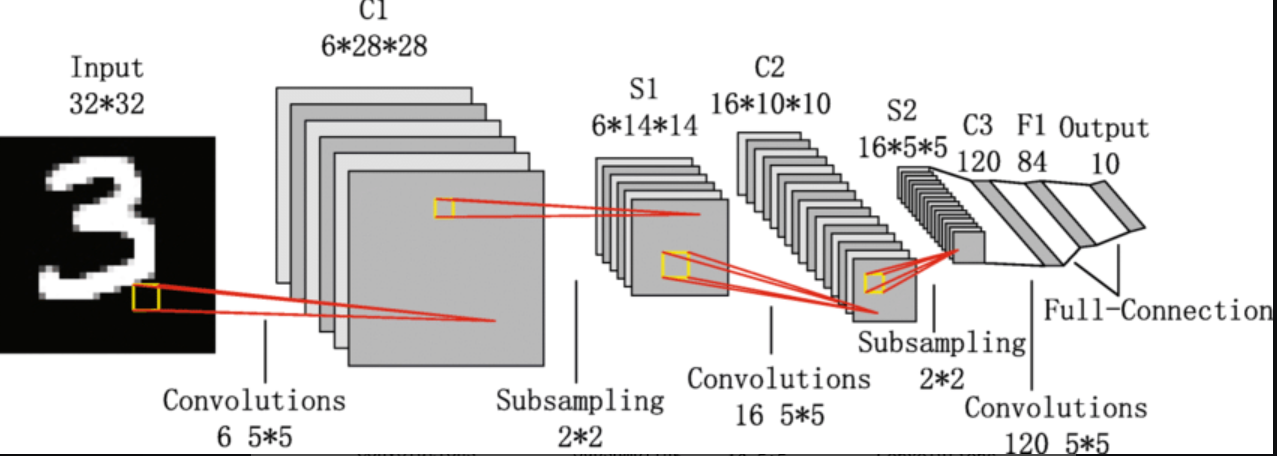

>CNN 모델들

1. LeNet 손글씨 분류 mnist
2. VGG 이미지넷imagenet이라는 데이터셋 challenge 준우승 모델.(2014) (더 간단한 구조, 좋은 성능: layer가 깊어질수록 성능이 좋아진다는 사실을 알게됨.)
    -> 시간이 되면, 이 구조를 짜 보는 것을 추천.
    -> VGG16구현. 
        sequential 이용하여 짜 보는 것 추천
        함수를 좀 더 쉽게 하는 법을 볼 수도 있음
        VGGnetwork github
3.  ResNet (2015) layer가 너무 깊어지면 성능이 떨어짐. 1보다 작은 값을 계속 곱하게 되어 gradient vanishing 현상이 나타남.
        -> skip connection 도임
            이전 feature에서의 '차이'값만 예측하게 함. (Resblock)
            output= input+차이의예측값
        -> convolution 2개 마다 skip connection
        -> 특징적인 구조가 있음.
        -> gradient는 덧셈에서는 그대로 넘어가는 특징을 나타냄.
        -> 마지막엔 fully connected
4. Unet 
   -> 바이오 메디칼 분야에서, end-to-end방식의
   fully-convolutional network 기반 모델.
   -> 인코더(내려가는부분) / 디코더
   -> 전체의 정보를 얻기 위한 네트워크 + a
    -> 업콘볼루션: 줄어든 가로-세로 크기를 늘리는 부분.
5. Transformer : 최근에 많이쓰는 구조.



torch.hub?
    이미 학습된 모델들 (ex. VGG, Resnet)을 가져와서 쓸 수도 있다.
    model = torch.hub.load("pytorch/vision:v0.10.0", "vgg11", pretrained = True)
    -> pytorch에 여러 툴들이 있다.


하려는 태스크에 따라 바꿔야하는게 네트워크 구조.


Data & dataloader

    학습할 떄 마다 
    ram에서는 cpu와 접근성이 좋아, 훨씬 빠르게 함.
    gpu 도 ram이 있는데, path를 그때 그 때 불러오는게 data library. 
    dataset : from torch.utils.data import 
    Dataset (유명 데이터셋이 들어있는 라이브러리)
    from torchvision.transforms import ToTensor (텐서로 이미지를 바꾸어줌.(?) 원래 이미지 값은 0에서 x까지인데,  네트워크에서 학습할때 필요한0에서 1사이 값으로 바꿔줌. )
    
        root = "data" -> data라는 폴더 안에 다운로드.
            ubyte -> 바이너리 파일. 이 다운받아짐.
        train=False -> 데이터 셋 중, 테스트데이터만 가져오겠다.

        plt.figure 

        sample_idx = torch.randint(len(training_data))  랜덤한 위치의 데이터 가져오기. 
        
        데이터 구조
        image와 label이 페어로 있음. 
        training_data[0][0] 이미지
        training_data[0][1] 레이블.

    구글링: image to numpy array
        pillow image 형태를 numpy array 형태(uint8)로 바꿔야함 -> np.array()
        
        transform = ToTensor

        전체 이미지 수 = 이미지 레이블 수

        torchvision.io (인풋, 아웃풋의 의미. 읽어주는 라이브러리)
            이 이미지를 저장할때도, 가져올 때도 이 라이브러리를 이용해 해야함

        DataLoader:
            -  배치 수 지정 (몇 개를 한꺼번에 가져올 것인지)
            - shuffle -> 랜덤한 것도.. 잘 섞어주는 역할.
  
        데이터로더로 트레인데이터 불러온 뒤에는
        for 문 이용 가능
            for 문을 돌릴 때,
            next(iter(train_dataloader))를 이용해 하나하나 꺼내줌.
        
        ? 바꿔주는건 원핫으로 바꿔준다?
            아니면 argumax로?

    
    
    Transforms            
        To Tensor()
        
        target transform 하려고 하는거?
            lambda transforms
            
            어떤 인풋이 들어왔을 떄, 괄호에 대한 내용이 출력된다는 의미.

            a = torch.zeros(10, dtype=torch,float)
            a.scatter_(dim=0, index=torch.tensor(3), value = 1)
            # 3번째 되는 위치마다에 1의 값이 되게 함.

            transform=ToTensor(),
            원핫형태로 (하나만 1인) 갖고있는 모습을 볼 수 있음.


        
    
    


1. Dataset & data